In [1]:
import numpy as np
import pandas as pd
import scipy.stats

In [2]:
df = pd.read_csv('soccer17.csv')

In [3]:
df.columns

Index(['Div', 'Date', 'Y', 'HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'HTHG',
       'HTAG', 'pH', 'pD', 'pA'],
      dtype='object')

# Problem 1

## 1a

In [4]:
df_filtered = df[(df['Y'] == 17) & (df['Div'] == 'EPL')].copy()
df_filtered['goal_diff'] = df_filtered['FTHG'] - df_filtered['FTAG']

tmp = df_filtered[['goal_diff', 'HomeTeam']]\
    .rename({'HomeTeam':'team'}, axis=1).copy()
tmp_2 = df_filtered[['goal_diff', 'AwayTeam']]\
    .rename({'AwayTeam':'team'}, axis=1).copy()

tmp_2['goal_diff'] = tmp_2['goal_diff'] * -1

games = pd.concat([tmp, tmp_2], axis=0)
games['outcome'] = np.where(games['goal_diff'] > 0, 1,
    np.where(games['goal_diff'] < 0, -1, games['goal_diff']))

goaldiff = games.groupby('team')\
    .agg({'goal_diff':np.mean, 
          'outcome':'count'})

outcomes = games.groupby(['team', 'outcome']).size().rename('count')\
    .reset_index()\
    .pivot(index='team', columns='outcome')\
    .droplevel(level=0, axis=1)

teams = pd.concat([goaldiff, outcomes], axis=1)\
    .rename({'goal_diff':'Average Goal Diff',
             'outcome':'Games',
             -1: 'Losses', 
             0: 'Ties',
             1: 'Wins'}, axis=1)\
    .sort_values('Average Goal Diff', ascending=False)
teams

,Average Goal Diff,Games,Losses,Ties,Wins
team,,,,,
Man City,2.078947,38,2,4,32
Liverpool,1.210526,38,5,12,21
Man United,1.052632,38,7,6,25
Tottenham,1.000000,38,7,8,23
Chelsea,0.631579,38,10,7,21
Arsenal,0.605263,38,13,6,19
Burnley,-0.078947,38,12,12,14
Leicester,-0.105263,38,15,11,12
Newcastle,-0.210526,38,18,8,12


In [25]:
print(teams.to_latex())

\begin{tabular}{lllrrrrrr}
\toprule
{} &           team &         Div &  Average Goal Diff &  Games &  rank &  Losses &  Ties &  Wins \\
\midrule
2  &  Bayern Munich &  Bundesliga &           1.882353 &     34 &   1.0 &       4 &     3 &    27 \\
4  &     Hoffenheim &  Bundesliga &           0.529412 &     34 &   2.0 &       9 &    10 &    15 \\
3  &       Dortmund &  Bundesliga &           0.500000 &     34 &   3.0 &       9 &    10 &    15 \\
9  &       Man City &         EPL &           2.078947 &     38 &   1.0 &       2 &     4 &    32 \\
7  &      Liverpool &         EPL &           1.210526 &     38 &   2.0 &       5 &    12 &    21 \\
10 &     Man United &         EPL &           1.052632 &     38 &   3.0 &       7 &     6 &    25 \\
1  &      Barcelona &     La\_Liga &           1.842105 &     38 &   1.0 &       1 &     9 &    28 \\
14 &    Real Madrid &     La\_Liga &           1.315789 &     38 &   2.0 &       6 &    10 &    22 \\
0  &     Ath Madrid &     La\_Liga &        

## 1b

In [27]:
teams['Points'] = teams['Wins'] * 3 + teams['Ties'] * 1
teams.sort_values('Points', ascending=False)

,team,Div,Average Goal Diff,Games,rank,Losses,Ties,Wins,Points
9,Man City,EPL,2.078947,38,1.0,2,4,32,100
5,Juventus,Serie_A,1.631579,38,1.0,3,5,30,95
1,Barcelona,La_Liga,1.842105,38,1.0,1,9,28,93
13,Paris SG,Ligue_1,2.078947,38,1.0,3,6,29,93
12,Napoli,Serie_A,1.263158,38,2.0,3,7,28,91
2,Bayern Munich,Bundesliga,1.882353,34,1.0,4,3,27,84
10,Man United,EPL,1.052632,38,3.0,7,6,25,81
11,Monaco,Ligue_1,1.052632,38,3.0,6,8,24,80
0,Ath Madrid,La_Liga,0.947368,38,3.0,5,10,23,79
8,Lyon,Ligue_1,1.157895,38,2.0,6,9,23,78


In [28]:
print(teams.sort_values('Points', ascending=False).to_latex())

\begin{tabular}{lllrrrrrrr}
\toprule
{} &           team &         Div &  Average Goal Diff &  Games &  rank &  Losses &  Ties &  Wins &  Points \\
\midrule
9  &       Man City &         EPL &           2.078947 &     38 &   1.0 &       2 &     4 &    32 &     100 \\
5  &       Juventus &     Serie\_A &           1.631579 &     38 &   1.0 &       3 &     5 &    30 &      95 \\
1  &      Barcelona &     La\_Liga &           1.842105 &     38 &   1.0 &       1 &     9 &    28 &      93 \\
13 &       Paris SG &     Ligue\_1 &           2.078947 &     38 &   1.0 &       3 &     6 &    29 &      93 \\
12 &         Napoli &     Serie\_A &           1.263158 &     38 &   2.0 &       3 &     7 &    28 &      91 \\
2  &  Bayern Munich &  Bundesliga &           1.882353 &     34 &   1.0 &       4 &     3 &    27 &      84 \\
10 &     Man United &         EPL &           1.052632 &     38 &   3.0 &       7 &     6 &    25 &      81 \\
11 &         Monaco &     Ligue\_1 &           1.052632 &     

## 1c

In [29]:
df_filtered = df[(df['Y'] == 17)].copy()
df_filtered['goal_diff'] = df_filtered['FTHG'] - df_filtered['FTAG']

tmp = df_filtered[['goal_diff', 'HomeTeam', 'Div']]\
    .rename({'HomeTeam':'team'}, axis=1).copy()
tmp_2 = df_filtered[['goal_diff', 'AwayTeam', 'Div']]\
    .rename({'AwayTeam':'team'}, axis=1).copy()

tmp_2['goal_diff'] = tmp_2['goal_diff'] * -1

games = pd.concat([tmp, tmp_2], axis=0)
games['outcome'] = np.where(games['goal_diff'] > 0, 1,
    np.where(games['goal_diff'] < 0, -1, games['goal_diff']))

goaldiff = games.groupby(['team', 'Div'])\
    .agg({'goal_diff':np.mean, 
          'outcome':'count'})\
    .reset_index()

goaldiff['rank'] = goaldiff\
    .groupby('Div')\
    ['goal_diff']\
    .rank(method='first', ascending=False)

goaldiff = goaldiff[goaldiff['rank'] <= 3]\
    .set_index(['team', 'Div'])

In [30]:
outcomes = games.groupby(['team', 'Div', 'outcome'])\
    .size().rename('count')\
    .reset_index()\
    .pivot(index=['team', 'Div'], columns='outcome')\
    .droplevel(level=0, axis=1)

In [31]:
teams = pd.merge(left=goaldiff, 
                 right=outcomes, 
                 how='inner',
                 left_index=True,
                 right_index=True)\
    .rename({'goal_diff':'Average Goal Diff',
             'outcome':'Games',
             -1: 'Losses', 
             0: 'Ties',
             1: 'Wins'}, axis=1)\
    .reset_index()\
    .sort_values(by=['Div', 'Average Goal Diff'], 
                 ascending=[True, False])
teams

,team,Div,Average Goal Diff,Games,rank,Losses,Ties,Wins
2,Bayern Munich,Bundesliga,1.882353,34,1.0,4,3,27
4,Hoffenheim,Bundesliga,0.529412,34,2.0,9,10,15
3,Dortmund,Bundesliga,0.500000,34,3.0,9,10,15
9,Man City,EPL,2.078947,38,1.0,2,4,32
7,Liverpool,EPL,1.210526,38,2.0,5,12,21
10,Man United,EPL,1.052632,38,3.0,7,6,25
1,Barcelona,La_Liga,1.842105,38,1.0,1,9,28
14,Real Madrid,La_Liga,1.315789,38,2.0,6,10,22
0,Ath Madrid,La_Liga,0.947368,38,3.0,5,10,23
13,Paris SG,Ligue_1,2.078947,38,1.0,3,6,29


In [32]:
print(teams.to_latex())

\begin{tabular}{lllrrrrrr}
\toprule
{} &           team &         Div &  Average Goal Diff &  Games &  rank &  Losses &  Ties &  Wins \\
\midrule
2  &  Bayern Munich &  Bundesliga &           1.882353 &     34 &   1.0 &       4 &     3 &    27 \\
4  &     Hoffenheim &  Bundesliga &           0.529412 &     34 &   2.0 &       9 &    10 &    15 \\
3  &       Dortmund &  Bundesliga &           0.500000 &     34 &   3.0 &       9 &    10 &    15 \\
9  &       Man City &         EPL &           2.078947 &     38 &   1.0 &       2 &     4 &    32 \\
7  &      Liverpool &         EPL &           1.210526 &     38 &   2.0 &       5 &    12 &    21 \\
10 &     Man United &         EPL &           1.052632 &     38 &   3.0 &       7 &     6 &    25 \\
1  &      Barcelona &     La\_Liga &           1.842105 &     38 &   1.0 &       1 &     9 &    28 \\
14 &    Real Madrid &     La\_Liga &           1.315789 &     38 &   2.0 &       6 &    10 &    22 \\
0  &     Ath Madrid &     La\_Liga &        

# Problem 2

## 2a
I can model the total number of goals using a Poisson distribution. The Poisson distribution assumes that each goal is scored independently of each other, which is a roughly true statement since people go back to the middle of the court after each goal. It assumes a single goal's scoring time follows an exponential distribution, so most goals happen quickly, which might not be a great assumption since there is a minimum time to score a goal usually.

If we do not use any covariates such as the year or the team, and we only have one Poisson model for the entire dataset, then the MLE estimate of the Poisson coefficient $\lambda$ is the mean of the total goals scores per game.

In [9]:
df['Total Goals'] = df['FTHG'] + df['FTAG']
coef = df['Total Goals'].mean()
coef

2.710158817086528

A graph of a Poisson distribution is overlayed onto a histogram of total wins per game. Shockingly (to me), they are almost exactly the same!

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
import scipy.stats as stats

In [12]:
pmf = stats.poisson.pmf(np.arange(0, 13), mu=coef)

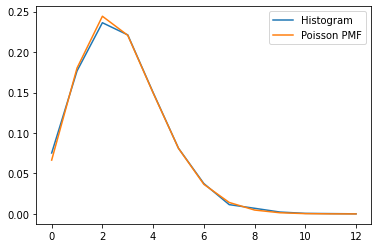

In [13]:
plt.plot(df['Total Goals'].value_counts(normalize=True).sort_index(),
         label='Histogram')
plt.plot(pmf, label='Poisson PMF')
plt.legend()

## 2b

In [14]:
df['First Half Goals'] = df['HTHG'] + df['HTAG']
coef = df['First Half Goals'].mean()
coef

1.1907174151150055

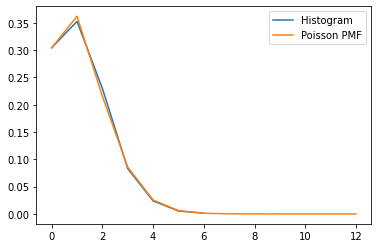

In [15]:
pmf = stats.poisson.pmf(np.arange(0, 13), mu=coef)
plt.plot(df['First Half Goals'].value_counts(normalize=True).sort_index(),
         label='Histogram')
plt.plot(pmf, label='Poisson PMF')
plt.legend()

## 2c
Interestingly, the Poisson parameter for the second half of the game is larger than the Poisson parameter for the first half of games. This means that more goals are made in the second half than the first half, which is a violation of the assumptions of the Poisson distribution (even though the distribution fits well anyways).

In [16]:
df['Second Half Goals'] = df['FTHG'] + df['FTAG'] - df['HTHG'] - df['HTAG']
coef = df['Second Half Goals'].mean()
coef

1.5194414019715226

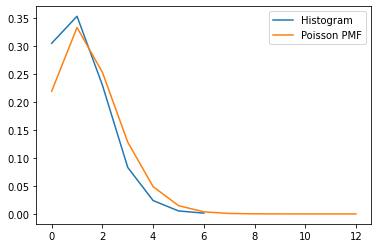

In [17]:
pmf = stats.poisson.pmf(np.arange(0, 13), mu=coef)
plt.plot(df['First Half Goals'].value_counts(normalize=True).sort_index(),
         label='Histogram')
plt.plot(pmf, label='Poisson PMF')
plt.legend()

## 2d

In [18]:
df.groupby('Div')\
    ['Total Goals']\
    .agg(['mean', 'count'])\
    .sort_values('mean', ascending=False)

,mean,count
Div,,
Bundesliga,2.811275,1224
La_Liga,2.759211,1520
Serie_A,2.725658,1520
EPL,2.686184,1520
Ligue_1,2.588158,1520


## 2e
To determine whether there is evidence of comeback tendency, we use a difference in proportions test between the proportion of draws we see vs. the proportion of draws the betting markets expected to see. Fix our p-value threshold to be $0.05$.

When looking at games with 4 goals scored, the possible goals distribution is 0-4, 1-3, 2-2, 3-1, and 4-0. Because the betting markets assign these games a win probability close to 0.5, that indicates that the expected probability for a goal to go to either team is 0.5 - a tossup. 

Under this scenario and assuming the goals scored are independently distributed within a game, we can calculate the number of draws we expect to see. In actuality, of the 37 games in the dataset, 19 of them (51.35%) have tied. By the Binomial Theorem, this would be ${4 \choose 2} \dfrac{1}{2}^4 = 0.375$, so in expectation, we should see around 37.5% of the 4-goal games to be draws. The standard error of our estimate is given by $\sqrt{p(1-p)(\frac{1}{n})} = \sqrt{37 * 0.375 * (1 - 0.375)} \approx 2.94$.

We derive the z-score by seeing the number of standard errors our empirical mean is from the theoretical expectation: $\dfrac{\frac{19}{37} - .375}{\sqrt{0.375 * (1 - .375) / 37}} = 1.74$. 

The p-value associated with this z-score is 0.04, which is less than our threshold of 0.05. Thus, we reject the null hypothesis and argue that there is evidence of comeback tendency. 

In [19]:
close_games = df[(df['Total Goals'] == 4) 
                 & (np.abs(df['pH'] - df['pA']) <= 0.02)]
close_games.groupby(['FTHG', 'FTAG']).size()

FTHG  FTAG
0     4        1
1     3        9
2     2       19
3     1        6
4     0        2
dtype: int64

In [20]:
difference_in_proportions = (19 / 37) - 0.375
difference_in_proportions

0.1385135135135135

In [21]:
standard_deviation = np.sqrt(0.375 * (1 - 0.375) / 37)
standard_deviation

0.07958931749587667

In [22]:
z_score = difference_in_proportions / standard_deviation
z_score

1.740353075909836

In [23]:
p_value = 1 - scipy.stats.norm().cdf(1.74)
p_value

0.040929508978807316